In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style='white' # creates a nicer layout
)
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
### DISPLAY MEAN ACCURACIES FOR EACH N-COMPONENT VALUE###

plt.clf()
for dataset in os.listdir('./results'):
    df = pd.read_csv('./results/' + dataset)
    mean_accuracies = df.groupby(['n_components'])['accuracy'].mean()
    lineplot = sns.lineplot(data=mean_accuracies)
    plt.ylim([0, 1])
    plt.savefig('graphs/comp-neigh-mean/' + str(dataset[:-4]) + '.png', bbox_inches='tight')
    plt.clf()

In [4]:
### DISPLAY MAX ACCURACIES FOR EACH N-COMPONENT VALUE###

plt.clf()
for dataset in os.listdir('./results'):
    df = pd.read_csv('./results/' + dataset)
    max_accuracies = df.groupby(['n_components'])['accuracy'].max()
    lineplot = sns.lineplot(data=max_accuracies)
    plt.ylim([0, 1])
    plt.savefig('graphs/comp-neigh-max/' + str(dataset[:-4]) + '.png', bbox_inches='tight')
    plt.clf()

In [5]:
### DISPLAY EVERY DATA POINT, EVERY N-NEIGHBORG/N-COMPONENT TEST PERFORMED ###

sns.scatterplot(data=df, x='n_components', y='accuracy', hue='n_neighbors')

plt.clf()
for dataset in os.listdir('./results'):
    df = pd.read_csv('./results/' + dataset)
    sns.scatterplot(data=df, x='n_components', y='accuracy', hue='n_neighbors', palette='deep')
    plt.ylim([0, 1])
    plt.savefig('graphs/comp-neigh-all/' + str(dataset[:-4]) + '.png', bbox_inches='tight')
    plt.clf()

n_neighbors,2,5,10,20,50
embedded_dimensions,,,,,
1%-50%,5,6,21,21,21
50%-100%,4,14,14,9,16
100%-150%,5,12,9,6,5
150%-200%,8,14,6,2,2


<Figure size 700x500 with 0 Axes>

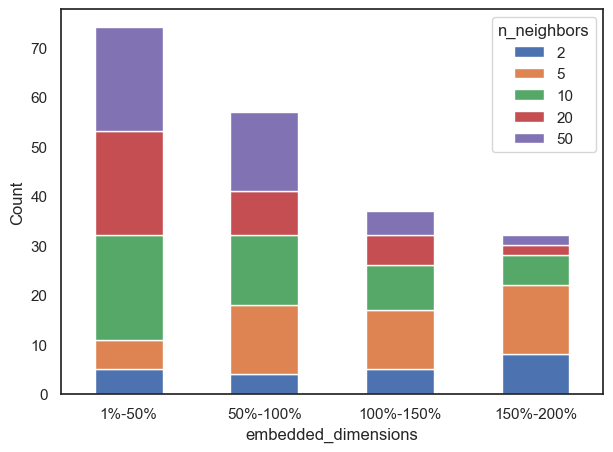

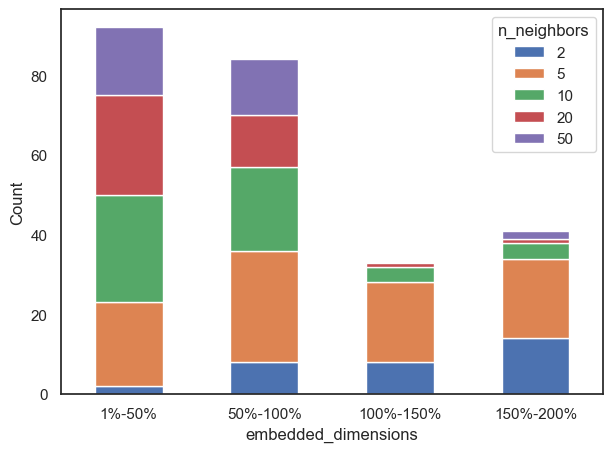

In [7]:
### GET 50 HIGHEST ACCURACIES OF EVERY DATASET AND COMPARE REGARDING N_OF_INSTANCES ###

# clear plt figure
plt.clf()

# initialize dataframe that will hold all 50 best accuracies of every dataset
df = pd.DataFrame()

for dataset in os.listdir('./results'):
    if dataset == 'total.csv':
        continue
    tmp = pd.read_csv('./results/' + dataset)
    tmp['n_components'] = round(tmp['n_components'] / tmp['intr_dim'], 2)
    tmp = tmp.nlargest(50, ['accuracy'])
    df = df.append(tmp)

# drop unused columns
df = df.reset_index().drop(['index', 'accuracy', 'time', 'intr_dim', 'silhouette', 'n_of_classes', 'n_of_features', 'dataset'], axis=1)
df['n_neighbors'] = df['n_neighbors'].astype('int')

# divide best accuracies from datasets with a many and with little n_of_instances
large_datasets = df[df['n_of_instances'] >= 50000] 
large_datasets = large_datasets.drop('n_of_instances', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
large_datasets['embedded_dimensions'] = pd.cut(large_datasets['n_components'], bins=bins, labels=labels)
large_datasets = large_datasets.drop(['n_components'], axis=1)
large_datasets_plot = large_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
display(large_datasets_plot)
large_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/large datasets.png', bbox_inches='tight')
plt.show()

small_datasets = df[df['n_of_instances'] < 50000] 
small_datasets = small_datasets.drop('n_of_instances', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
small_datasets['embedded_dimensions'] = pd.cut(small_datasets['n_components'], bins=bins, labels=labels)
small_datasets = small_datasets.drop(['n_components'], axis=1)
small_datasets_plot = small_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
small_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/small datasets.png', bbox_inches='tight')
plt.show()

<Figure size 700x500 with 0 Axes>

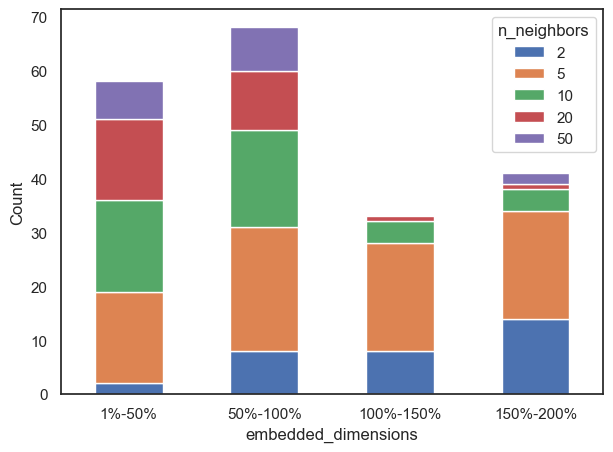

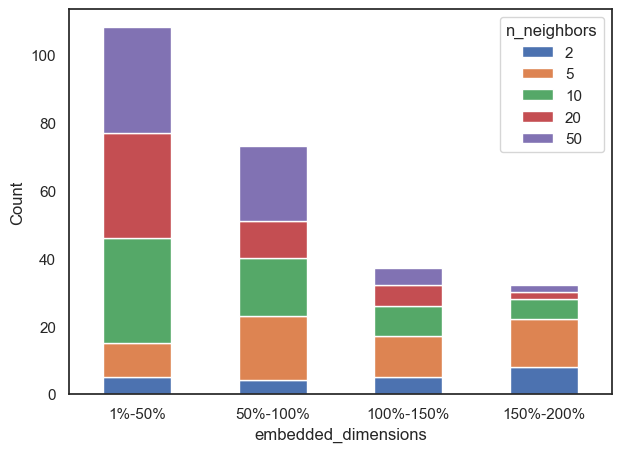

In [8]:
### GET 50 HIGHEST ACCURACIES OF EVERY DATASET AND COMPARE REGARDING N_OF_FEATURES ###

# clear plt figure
plt.clf()

# initialize dataframe that will hold all 50 best accuracies of every dataset
df = pd.DataFrame()

for dataset in os.listdir('./results'):
    if dataset == 'total.csv':
        continue
    tmp = pd.read_csv('./results/' + dataset)
    tmp['n_components'] = round(tmp['n_components'] / tmp['intr_dim'], 2)
    tmp = tmp.nlargest(50, ['accuracy'])
    df = df.append(tmp)

# drop unused columns
df = df.reset_index().drop(['index', 'accuracy', 'time', 'intr_dim', 'silhouette', 'n_of_classes', 'n_of_instances', 'dataset'], axis=1)
df['n_neighbors'] = df['n_neighbors'].astype('int')

# divide best accuracies from dataset with a lot and with little n_of_features
vhd_datasets = df[df['n_of_features'] > 3072] 
vhd_datasets = vhd_datasets.drop('n_of_features', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
vhd_datasets['embedded_dimensions'] = pd.cut(vhd_datasets['n_components'], bins=bins, labels=labels)
vhd_datasets = vhd_datasets.drop(['n_components'], axis=1)
vhd_datasets_plot = vhd_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
vhd_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/very high-dim datasets.png', bbox_inches='tight')
plt.show()

hd_datasets = df[df['n_of_features'] <= 3072] 
hd_datasets = hd_datasets.drop('n_of_features', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
hd_datasets['embedded_dimensions'] = pd.cut(hd_datasets['n_components'], bins=bins, labels=labels)
hd_datasets = hd_datasets.drop(['n_components'], axis=1)
hd_datasets_plot = hd_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
hd_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/high-dim datasets.png', bbox_inches='tight')
plt.show()

<Figure size 700x500 with 0 Axes>

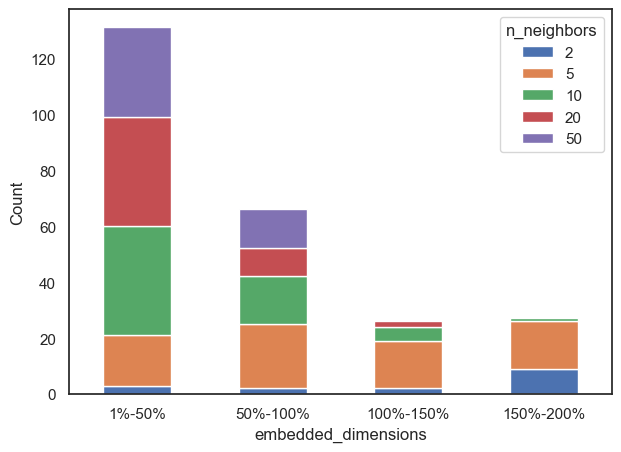

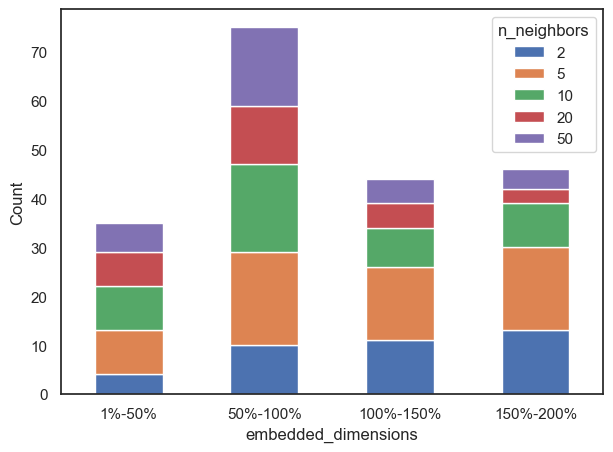

In [9]:
### GET 50 HIGHEST ACCURACIES OF EVERY DATASET AND COMPARE REGARDING SILHOUETTE ###

# clear plt figure
plt.clf()

# initialize dataframe that will hold all 50 best accuracies of every dataset
df = pd.DataFrame()

for dataset in os.listdir('./results'):
    if dataset == 'total.csv':
        continue
    tmp = pd.read_csv('./results/' + dataset)
    tmp['n_components'] = round(tmp['n_components'] / tmp['intr_dim'], 2)
    tmp = tmp.nlargest(50, ['accuracy'])
    df = df.append(tmp)

# drop unused columns
df = df.reset_index().drop(['index', 'accuracy', 'time', 'intr_dim', 'n_of_features', 'n_of_classes', 'n_of_instances', 'dataset'], axis=1)
df['n_neighbors'] = df['n_neighbors'].astype('int')

#scale silhouette value
df['silhouette'] -= df['silhouette'].min()
df['silhouette'] /= df['silhouette'].max()
df['silhouette'] = round(df['silhouette'], 2)

# divide best accuracies from dataset with a lot and with little silhouette
large_silh_datasets = df[df['silhouette'] > 0.46] 
large_silh_datasets = large_silh_datasets.drop('silhouette', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
large_silh_datasets['embedded_dimensions'] = pd.cut(large_silh_datasets['n_components'], bins=bins, labels=labels)
large_silh_datasets = large_silh_datasets.drop(['n_components'], axis=1)
large_silh_datasets_plot = large_silh_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
large_silh_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/large silhouette datasets.png', bbox_inches='tight')
plt.show()

small_silh_datasets = df[df['silhouette'] <= 0.46] 
small_silh_datasets = small_silh_datasets.drop('silhouette', axis=1)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['1%-50%','50%-100%','100%-150%','150%-200%']
small_silh_datasets['embedded_dimensions'] = pd.cut(small_silh_datasets['n_components'], bins=bins, labels=labels)
small_silh_datasets = small_silh_datasets.drop(['n_components'], axis=1)
small_silh_datasets_plot = small_silh_datasets.groupby(['n_neighbors', 'embedded_dimensions']).size().reset_index().pivot(columns='n_neighbors', index='embedded_dimensions', values=0)
small_silh_datasets_plot.plot(kind='bar', stacked=True, ylabel='Count')
plt.xticks(rotation=0)
plt.savefig('graphs/50 best/small silhouette datasets.png', bbox_inches='tight')
plt.show()